# Final Project

### Shortcuts
- [Cleaning the Data](#section 1)<br>
- [Visualisations](#section 2)<br>
- [Color Space Visualisations](#section last)<br>

#### Dependencies

In [1]:
import numpy as np
from datascience import *
import pandas as pd

import matplotlib.pyplot as plt
import matplotlib
%matplotlib inline
plt.style.use('seaborn-darkgrid')

from bokeh.plotting import figure, output_file, show
import seaborn as sns

from colormath.color_objects import *
from colormath.color_conversions import convert_color

In [2]:
#for plotting
from wcsHelper import *
munsell_to_chip, chip_to_munsell, chip_to_clab, chip_to_rgb = readChipData('chipnum-info.txt')

# Data<a id='section 1'>

In [3]:
from wcs_helper_functions import *
from wcs_table_helper import *

coord_to_index, index_to_coord = readChipData('./WCS_data_core/chip.txt')
coordToIndexTable, indexToCoordTable = loadChipTables(coord_to_index, index_to_coord)

index_to_clab = readClabData('./WCS_data_core/cnum-vhcm-lab-new.txt')
clabTable = loadClabTable(index_to_clab)

namingData = readNamingData('./WCS_data_core/term.txt')
namingTable = loadNamingTable(namingData)

fociData = readFociData('./WCS_data_core/foci-exp.txt')
fociTable = loadFociTable(fociData)

speakerData = readSpeakerData('./WCS_data_core/spkr-lsas.txt')
speakerTable = loadSpeakerTable(speakerData)

In [4]:
ctit = coordToIndexTable.join('Index', clabTable)
ctit

Index,Coordinate,l,a,b
1,E29,61.70,-4.52,-39.18
2,C23,81.35,-19.64,-4.30
3,F4,51.57,55.20,68.32
4,I36,20.54,24.14,-14.33
5,C20,81.35,-33.04,4.96
6,C6,81.35,14.87,30.96
7,E15,61.70,-46.97,64.65
8,H40,30.77,47.63,5.24
9,G6,41.22,22.15,41.13
10,I30,20.54,7.63,-35.92


In [5]:
def str_to_float(arr):
    new_arr = np.array([])
    for i in arr:
        new_arr = np.append(new_arr, float(i))
    return new_arr

clabsort = Table().with_column('Index', np.arange(1, 331))
for i in np.arange(1, 4):
    label = ['l', 'l', 'a', 'b']
    flt = str_to_float(clabTable.column(i))
    clabsort = clabsort.with_column(label[i], flt)
clabsort

Index,l,a,b
1,61.7,-4.52,-39.18
2,81.35,-19.64,-4.3
3,51.57,55.2,68.32
4,20.54,24.14,-14.33
5,81.35,-33.04,4.96
6,81.35,14.87,30.96
7,61.7,-46.97,64.65
8,30.77,47.63,5.24
9,41.22,22.15,41.13
10,20.54,7.63,-35.92


In [6]:
indexcoordtable = indexToCoordTable.join('Coordinate', ctit, 'Index').relabel(3, 'index').drop(4, 5, 6)
indexcoordclabtable = indexcoordtable.join('Coordinate', clabsort, 'Index')
indexcoordclabtable

Coordinate,Lightness,Hue,index,l,a,b
1,E,29,E29,61.7,-4.52,-39.18
2,C,23,C23,81.35,-19.64,-4.3
3,F,4,F4,51.57,55.2,68.32
4,I,36,I36,20.54,24.14,-14.33
5,C,20,C20,81.35,-33.04,4.96
6,C,6,C6,81.35,14.87,30.96
7,E,15,E15,61.7,-46.97,64.65
8,H,40,H40,30.77,47.63,5.24
9,G,6,G6,41.22,22.15,41.13
10,I,30,I30,20.54,7.63,-35.92


In [7]:
ft_w_ind = fociTable.with_column('Chip (foci)', [fociTable.column('Foci')[i].replace(':', "") for i in range(len(fociTable.column('Foci')))])
ft_w_ind

Language,Speaker,Term,Foci,Chip (foci)
1,1,LF,A:0,A0
1,1,WK,D:9,D9
1,1,WK,D:10,D10
1,1,WK,D:11,D11
1,1,WK,D:12,D12
1,1,F,D:25,D25
1,1,LB,J:0,J0
1,1,G,F:17,F17
1,1,LE,F:1,F1
1,1,LE,F:2,F2


In [8]:
index = 1
speaker = ft_w_ind.column('Speaker')
response = np.array([])
for i in range(ft_w_ind.num_rows):
    if speaker[i] != speaker[i-1]:
        index = 1
        response = np.append(response, index)
    else:
        index += 1
        response = np.append(response, index)

In [9]:
ft_indresp = ft_w_ind.with_column('foci num', response)
ft_indresp 

Language,Speaker,Term,Foci,Chip (foci),foci num
1,1,LF,A:0,A0,1
1,1,WK,D:9,D9,2
1,1,WK,D:10,D10,3
1,1,WK,D:11,D11,4
1,1,WK,D:12,D12,5
1,1,F,D:25,D25,6
1,1,LB,J:0,J0,7
1,1,G,F:17,F17,8
1,1,LE,F:1,F1,9
1,1,LE,F:2,F2,10


In [10]:
#sorted
ft_ir = ft_indresp.join('Chip (foci)', 
                        indexcoordclabtable, 
                        'index').sort('foci num').sort('Speaker').sort('Language')
ft_ir

Chip (foci),Language,Speaker,Term,Foci,foci num,Coordinate,Lightness,Hue,l,a,b
A0,1,1,LF,A:0,1,141,A,0,96,-0.06,0.06
D9,1,1,WK,D:9,2,326,D,9,71.6,6.22,81.95
D10,1,1,WK,D:10,3,146,D,10,71.6,-2.3,85.64
D11,1,1,WK,D:11,4,258,D,11,71.6,-9.51,87.14
D12,1,1,WK,D:12,5,193,D,12,71.6,-15.98,87.62
D25,1,1,F,D:25,6,49,D,25,71.6,-22.32,-14.67
J0,1,1,LB,J:0,7,89,J,0,15.6,-0.02,0.02
F17,1,1,G,F:17,8,202,F,17,51.57,-63.28,28.95
F1,1,1,LE,F:1,9,321,F,1,51.57,59.36,19.67
F2,1,1,LE,F:2,10,298,F,2,51.57,58.01,30.52


----

# Lightness in WCS Data

In [11]:
num2let = {let: num for num, let in dict(enumerate(np.unique(ft_ir.column('Lightness'))[::-1], 1)).items()}
num_lightness = np.array([])
for i in ft_ir.column('Lightness'):
    num_lightness = np.append(num_lightness, num2let[i])
ft_ir = ft_ir.with_column('numlight', num_lightness)

----

To work with the data, we first will change `age` column from string to integer.

In [12]:
int_age = str_to_float(speakerTable.column('Age'))
speakerTable = speakerTable.with_column('Age (int)', int_age)

Remove unknown/missing terms, denoted as \*, ?, and ''

In [13]:
f = ctit.join('Index', namingTable.where('Term', are.not_contained_in('*''?')))
s = f.sort('Speaker').sort('Language')

In [14]:
def letter_to_num(item):
    return num2let[item[0]]

s = s.with_column('num lightness', s.apply(letter_to_num, 'Coordinate'))
s_l=s.with_column('l', s.apply(float, 'l'))

In [15]:
s_l = s_l.select('Language', 'Speaker', 'l', 'num lightness')
s_l

Language,Speaker,l,num lightness
1,1,61.7,6
1,1,81.35,8
1,1,51.57,5
1,1,20.54,2
1,1,81.35,8
1,1,81.35,8
1,1,61.7,6
1,1,30.77,3
1,1,41.22,4
1,1,20.54,2


In [16]:
s_l = s_l.sort('Speaker').sort('Language')#.num_rows#.join(['Language', 'Speaker'], speakerTable)

In [19]:
st_df = speakerTable.to_df()
sl_df = s_l.to_df()
st_df.drop([1506, 2117]).shape

(2616, 5)

In [20]:
lang_spk = speakerTable.group('Language')
langs = lang_spk.column(0)
speakers = speakerTable.group('Language', np.unique).column(1)

In [21]:
lightness = np.array([])
lang_and_spkrs = {l: c for l, c in zip(langs, speakers)}
for l, c in lang_and_spkrs.items():
    lang = ft_ir.where('Language', l)
    for i in c:
        ith_speaker = lang.where('Speaker', i)
        m_lightness = np.mean(ith_speaker.column('numlight'))
        lightness = np.append(lightness, m_lightness)

In [22]:
spkr_resp = Table().from_df(st_df.merge(ft_ir.select('Language', 'Speaker', 'l', 'numlight').to_df()))
spkr_resp

Language,Speaker,Age,Gender,Age (int),l,numlight
1,1,90,M,90,96,10
1,1,90,M,90,71.6,7
1,1,90,M,90,71.6,7
1,1,90,M,90,71.6,7
1,1,90,M,90,71.6,7
1,1,90,M,90,71.6,7
1,1,90,M,90,15.6,1
1,1,90,M,90,51.57,5
1,1,90,M,90,51.57,5
1,1,90,M,90,51.57,5


In [74]:
u_terms = namingTable.where('Term', are.not_contained_in('*''?')).group('Language', np.unique)
langunique = {}
for i in np.arange(110):
    langunique[i+1] = u_terms.column('Term unique')[i]
#Get number of unique color terms

In [24]:
unique = {}
for k, v in langunique.items():
    if len(v) in unique:
        unique[len(v)].append(k)
    else:
        unique[len(v)] = [k]
#get dictionary w number unique color terms (keys) and list of languages w that number of color terms (values)/

In [25]:
spkr_resp = spkr_resp.where('Age (int)', are.above(0))
spkr_resp

Language,Speaker,Age,Gender,Age (int),l,numlight
1,1,90,M,90,96,10
1,1,90,M,90,71.6,7
1,1,90,M,90,71.6,7
1,1,90,M,90,71.6,7
1,1,90,M,90,71.6,7
1,1,90,M,90,71.6,7
1,1,90,M,90,15.6,1
1,1,90,M,90,51.57,5
1,1,90,M,90,51.57,5
1,1,90,M,90,51.57,5


In [66]:
observed = []
for i in unique.keys():
    observed = spkr_resp.where('Language', are.contained_in(unique[i])).group('Age (int)', np.mean)
    observed.append([i, np.polyfit(terms.column('Age (int)'), terms.column('numlight mean'), 1)[0]])
print('Group of langauges (based on number of unique color terms with greatest observed slope')
print(max(observed, key = lambda x: x[1]))
print('Group of langauges (based on number of unique color terms with most negative observed slope')
print(min(observed, key = lambda x: x[1]))

Group of langauges (based on number of unique color terms with greatest observed slope
[32, 0.02269207250800468]
Group of langauges (based on number of unique color terms with most negative observed slope
[62, -0.05105950327469309]


----

## 32 unique color terms - greatest observed slope
32 terms is the group of languages with the greatest linear association betwwen age and mean lightness. Is there a possibility that this observation is due to random chance? To check, simulate by bootstrapping 10000 times and calculating the slope, and then caluclate the 95% confidence interval.

In [61]:
terms32 = spkr_resp.where('Language', are.contained_in(unique[32])).select('Age (int)', 'numlight')
mean_32terms = terms32.group('Age (int)', np.mean)
print('Observed slope')
print(np.polyfit(mean_32terms.column('Age (int)'), mean_32terms.column('numlight mean'), 1)[0])

Observed slope
0.02269207250800468


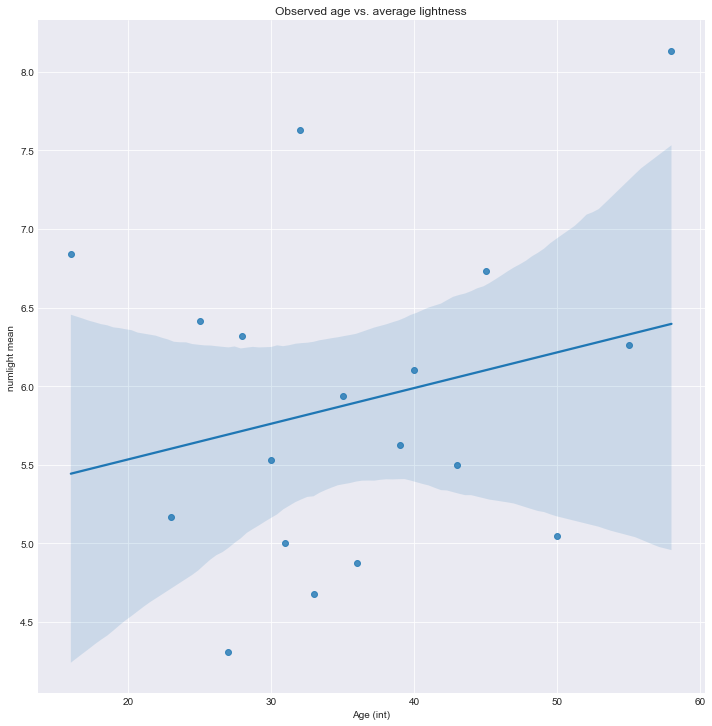

In [71]:
sns.lmplot(x="Age (int)", y="numlight mean", truncate=True, size=10, data=mean_32terms.to_df());
plt.title('Observed age vs. average lightness');

In [67]:
predictions_32 = np.array([])
r_32 = np.array([])
for i in np.arange(10000):
    sample = terms32.sample()
    sample = sample.group('Age (int)', np.mean)
    slope = np.polyfit(sample.column('Age (int)'), sample.column('numlight mean'), 1)[0]
    predictions_32 = np.append(predictions_32, slope)

In [69]:
print('Approximate 95% confidence interval for the true slope')
left32 = np.percentile(predictions_32, 2.5)
right32 = np.percentile(predictions_32, 97.5)
print(left32, right32)

Approximate 95% confidence interval for the true slope
-0.003226058358202076 0.04748821520667604


In [70]:
unique[32]

[52, 63]

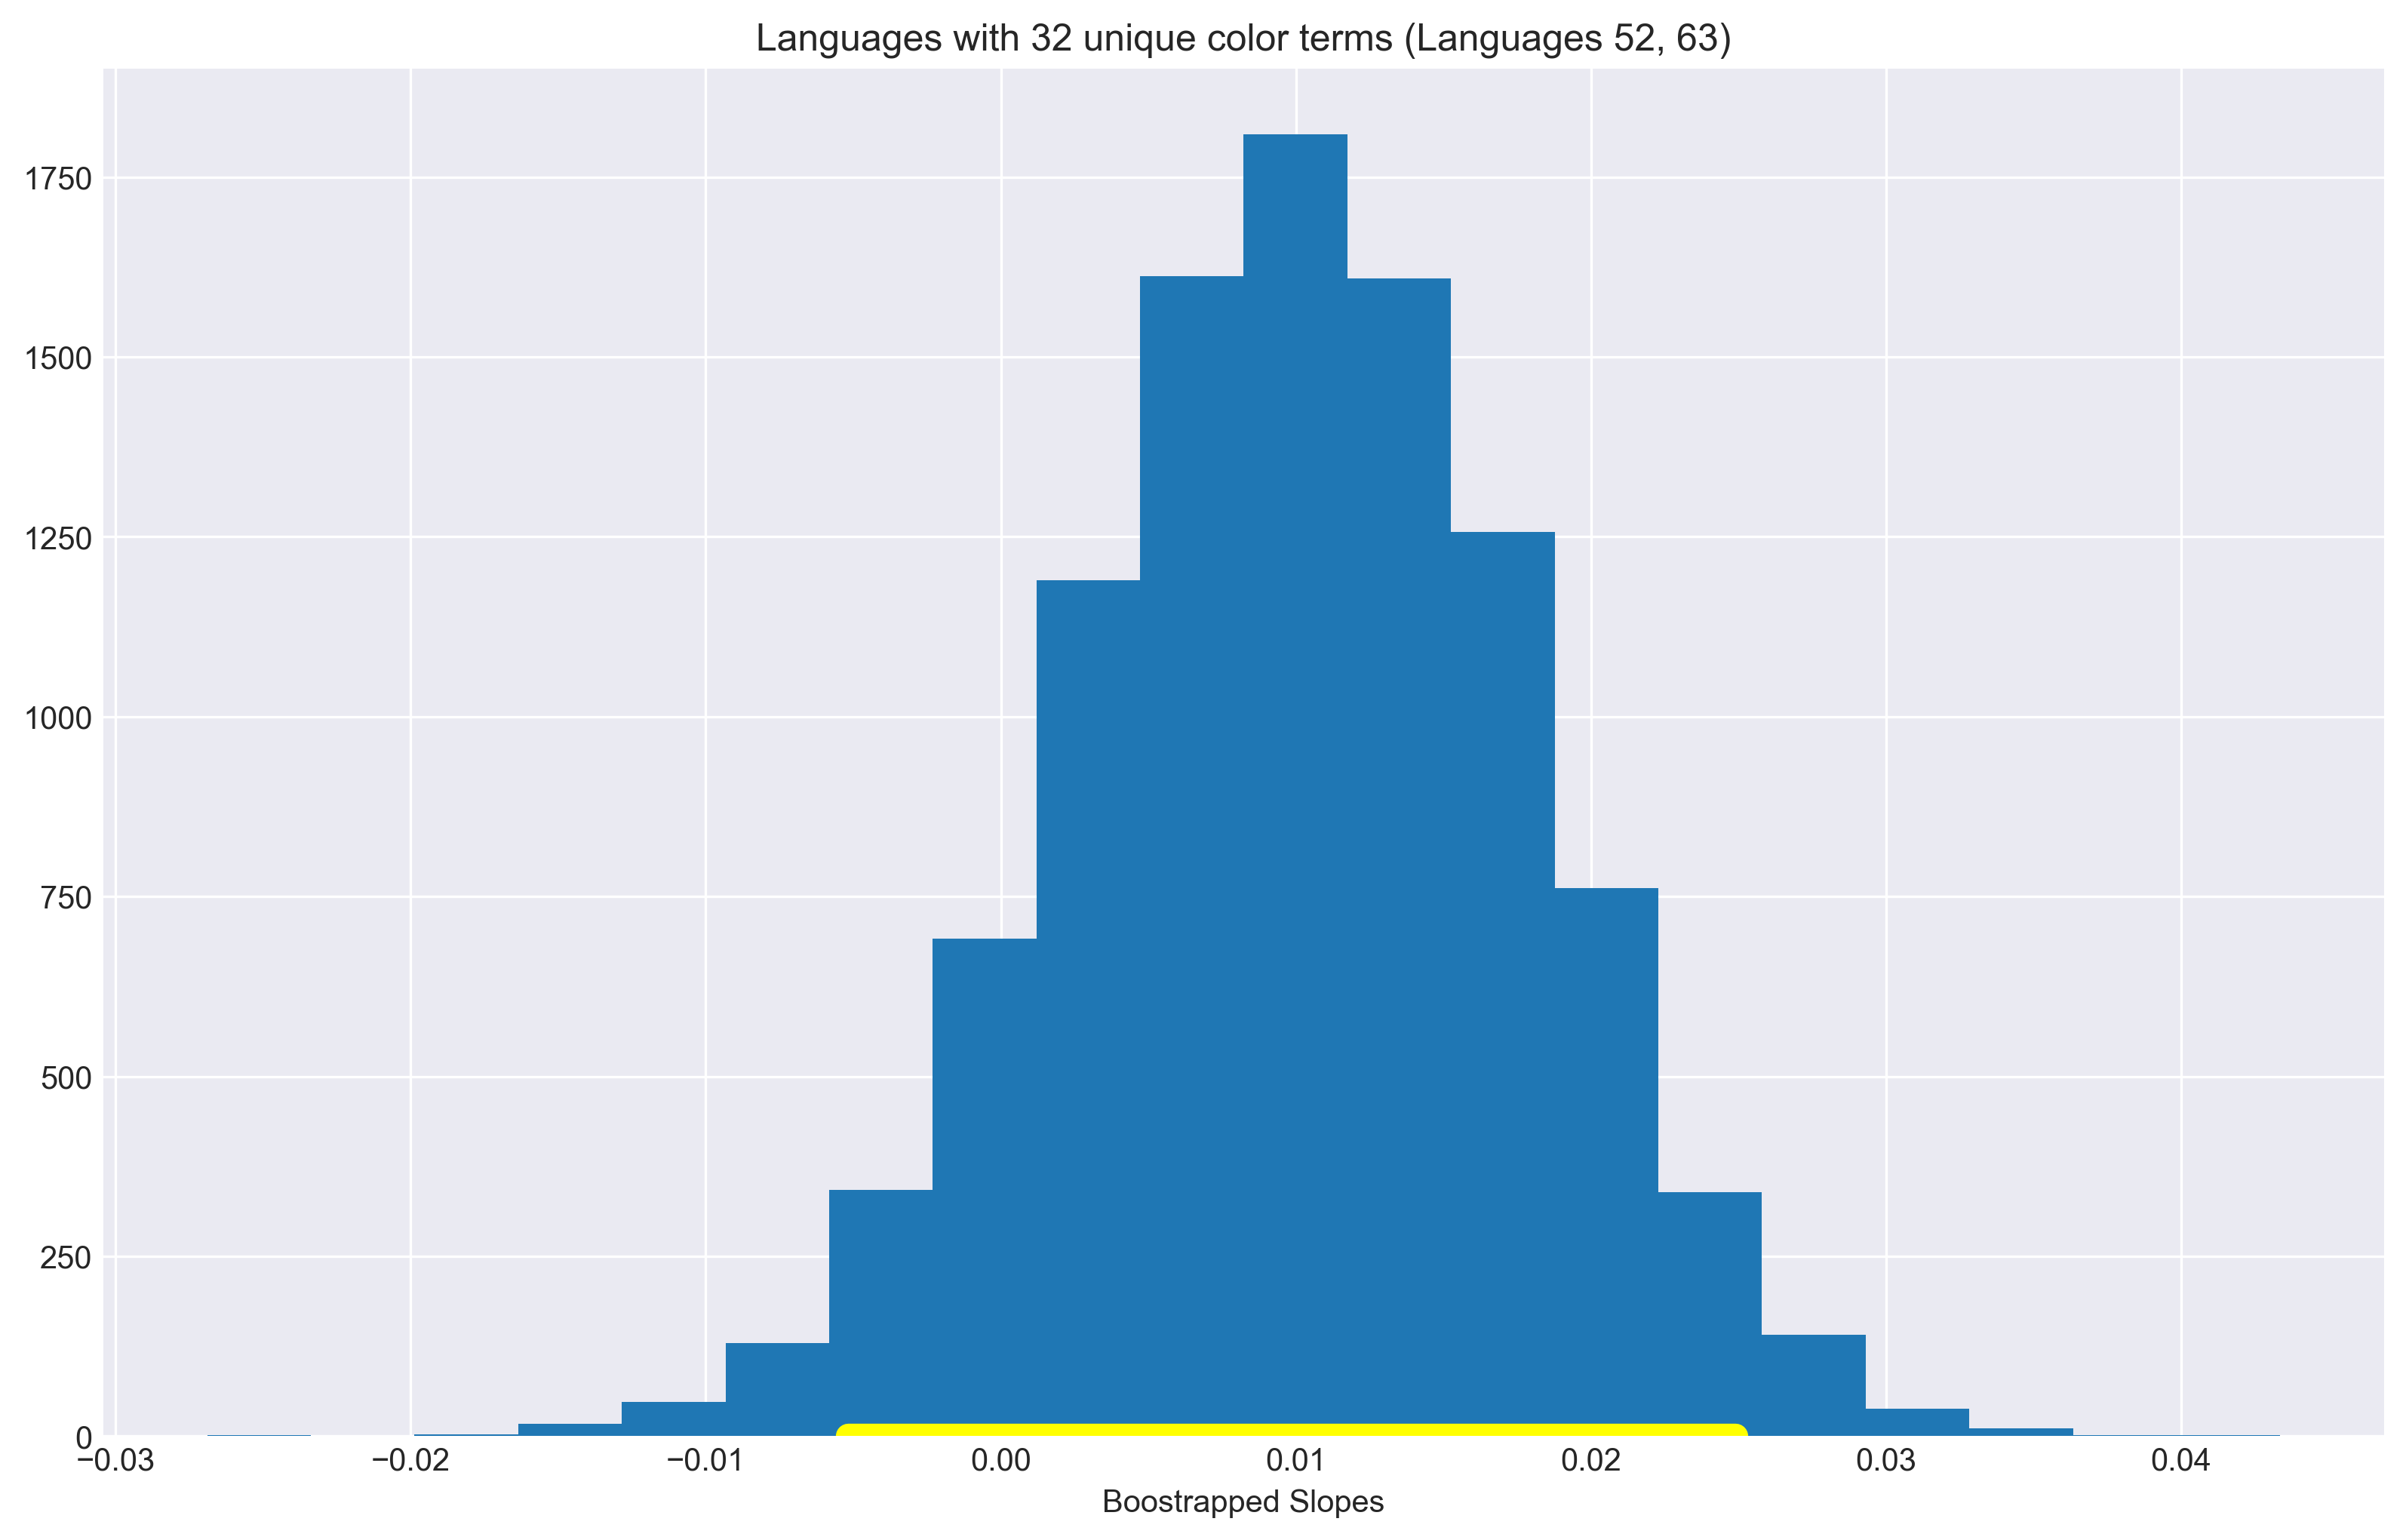

In [72]:
plt.figure(figsize=(13, 8), dpi=300)
plt.hist(predictions_47, bins = 20);
plt.xlabel('Boostrapped Slopes')
plt.title('Bootstrapped slopes of languages with 32 unique color terms (Languages 52, 63)')
plt.plot(make_array(left47, right47), make_array(0, 0), color='yellow', lw=8);

With our confidence interval constructed from bootstrapped samples, we can see that 0 falls in the interval. So, we fail to reject the null hypothesis that the true slope for 

-----

## 62 unique color terms - lowest observed slope

See if it is possible that the slope for age and the languages with 62 unique color terms (which is the group with the strongest negative linear association) can possibly be 0.

In [73]:
terms62 = spkr_resp.where('Language', 103) #unique[62] : [103]
mean_62 = terms62.group('Age (int)', np.mean)
print('Observed slope')
print(np.polyfit(mean_62.column('Age (int)'), mean_62.column('numlight mean'), 1)[0])

Observed slope
-0.05105950327469309


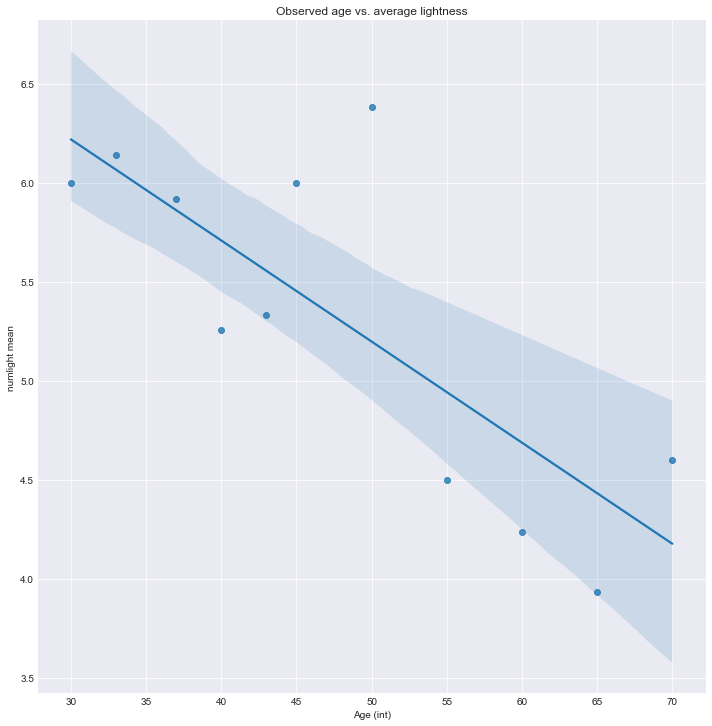

In [58]:
unique[62] #language 103 is Warlpiri spoken by the Warlpiri people in northern Australia
sns.lmplot(x="Age (int)", y="numlight mean", truncate=True, size=10, data=mean_62.to_df())
plt.title('Observed age vs. average lightness');

In [43]:
predictions_62 = np.array([])
r_62 = np.array([])
for i in np.arange(10000):
    sample = terms62.sample()
    sample = sample.group('Age (int)', np.mean)
    slope = np.polyfit(sample.column('Age (int)'), sample.column('numlight mean'), 1)[0]
    predictions_62 = np.append(predictions_62, slope)

In [44]:
print('Approximate 95% confidence interval for the true slope')
left62 = np.percentile(predictions_62, 2.5)
right62 = np.percentile(predictions_62, 97.5)
print(left62, right62)

Approximate 95% confidence interval for the true slope
-0.08864038084509336 -0.017702726566769283


So, based on our null hypothesis that our true slope is 0, we can reject the null hypothesis because a slope of 0 does not fall in our confidence interval.

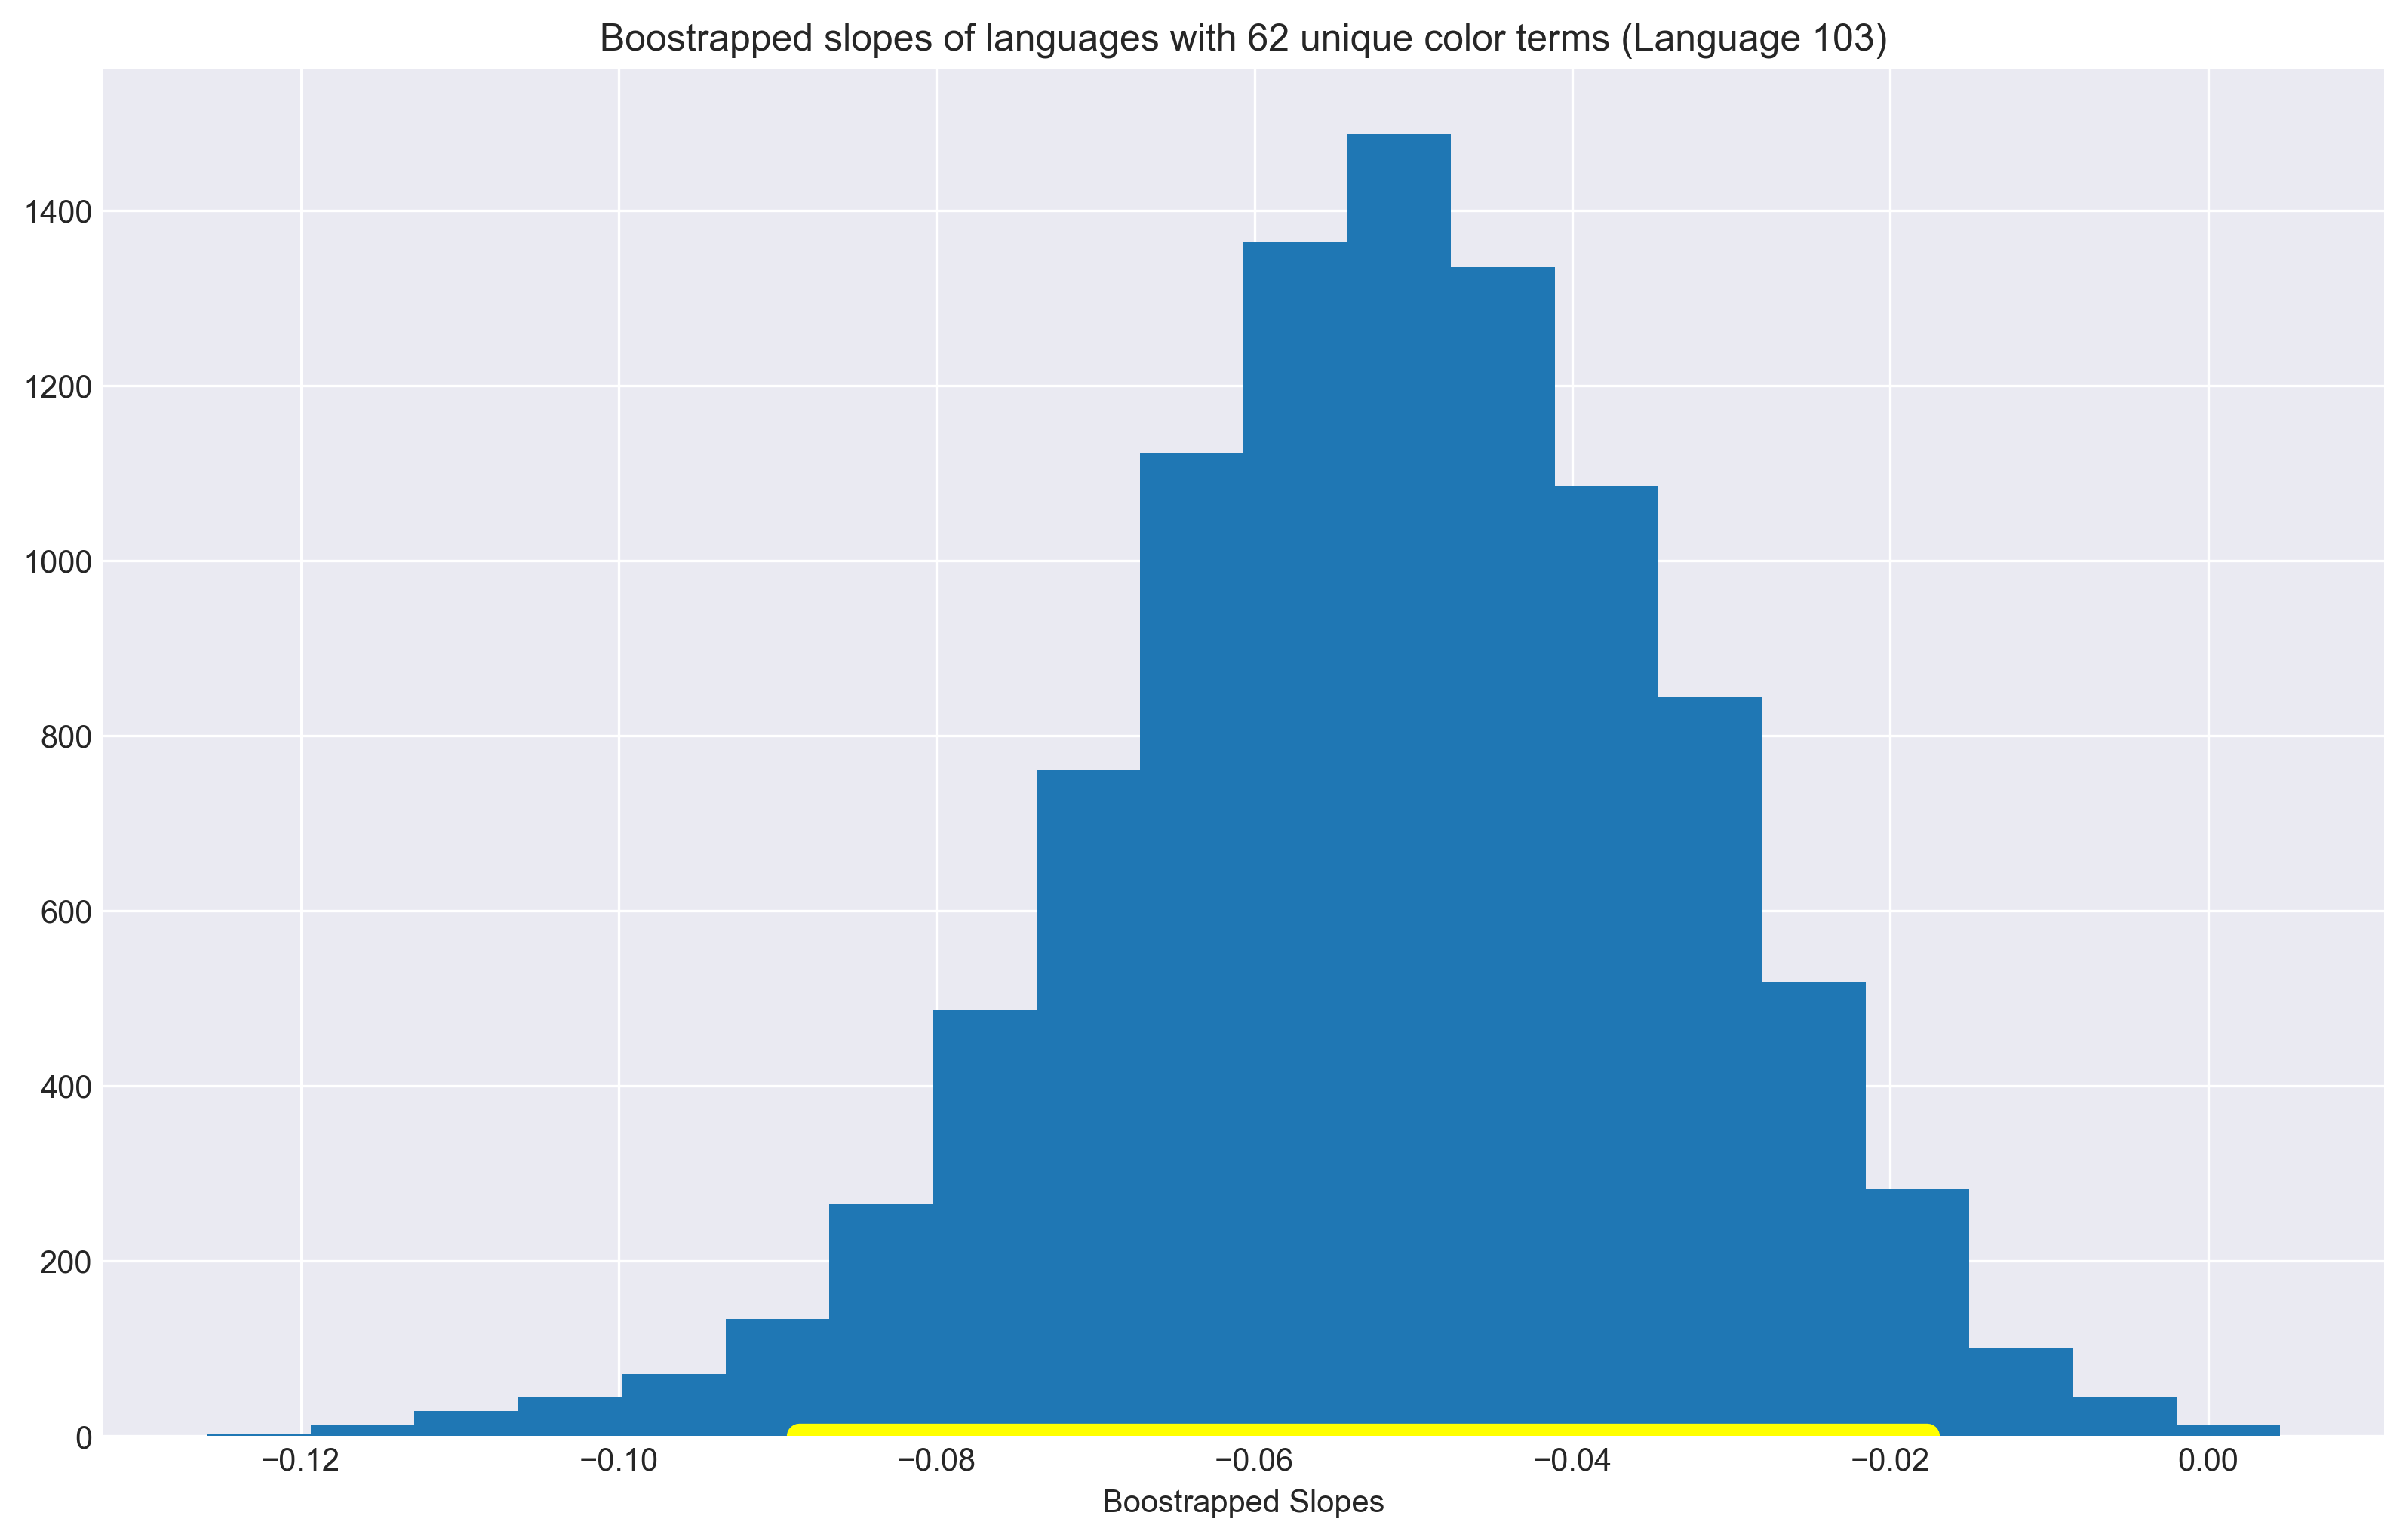

In [59]:
plt.figure(figsize=(13, 8), dpi=300)
plt.hist(predictions_62, bins = 20);
plt.xlabel('Boostrapped Slopes')
plt.title('Boostrapped slopes of languages with 62 unique color terms (Language 103)')
plt.plot(make_array(left62, right62), make_array(0, 0), color='yellow', lw=8);

# Color Space Visualizations<a id='section last'>

In [275]:
import matplotlib.pyplot as plt
from mpl_toolkits import mplot3d

In [276]:
from colormath.color_objects import sRGBColor
from colormath.color_conversions import convert_color

In [282]:
lz = indexcoordclabtable.column('l')
a_x = indexcoordclabtable.column('a')
by = indexcoordclabtable.column('b')

In [283]:
hexcolor = make_array()
for i in np.arange(len(a_x)):
    lab = LabColor(lz[i], a_x[i], by[i])
    rgb = convert_color(lab, sRGBColor)
    hexcolor = np.append(hexcolor, rgb.get_rgb_hex())

colors = []
for i in np.arange(len(a_x)):
    lab = LabColor(lz[i], a_x[i], by[i])
    rgb = convert_color(lab, sRGBColor)
    r = str(rgb.get_value_tuple()[0] * 255)
    g = str(rgb.get_value_tuple()[1] * 255)
    b = str(rgb.get_value_tuple()[2] * 255)
    color = 'rgb(152, 0, 0)'
    colors += ['rgb('+ r + ', ' + g +', ' +  b + ')']

In [284]:
import plotly
import plotly.plotly as py
import plotly.graph_objs as go

In [83]:
all_color = go.Scatter3d(
    x=a_x,
    y=by,
    z=lz,
    mode='markers',
    marker=dict(
        size=8.5,
        color=colors,  
        opacity=0.8))

data = [all_color]
layout = go.Layout(
    title='Color Space (LAB to RGB)',
    scene = dict(
        xaxis = dict(title='a*'),
        yaxis = dict(title='b*'),
        zaxis = dict(title='L*'),),
    width=700,
    margin = dict(l=0, r=0, b=0, t=0)
    )

fig = go.Figure(data=data, layout=layout)
py.iplot(fig, file='LABColor')

In [285]:
%matplotlib inline
plt.style.use('fivethirtyeight')
from mpl_toolkits.mplot3d import Axes3D
from matplotlib.colors import *

In [286]:
colorzzz = []
for i in np.arange(len(a_x)):
    lab = LabColor(lz[i], a_x[i], by[i])
    rgb = convert_color(lab, sRGBColor)
    r = rgb.get_value_tuple()[0]
    g = rgb.get_value_tuple()[1]
    b = rgb.get_value_tuple()[2]
    colorzzz.append((r, g, b))
colorzzz

a = np.array([colorzzz[0]])
for i in np.arange(0, 330):
    a = np.vstack([a, colorzzz[i]])
numbered = a[1:]

In [287]:
#correct the index 
def find(lst):
    index = 0
    for i in lst:
        if i == '#100be00':
            return index
        index += 1
fix = find(hexcolor)
hexcolor[fix] = '#00be00'

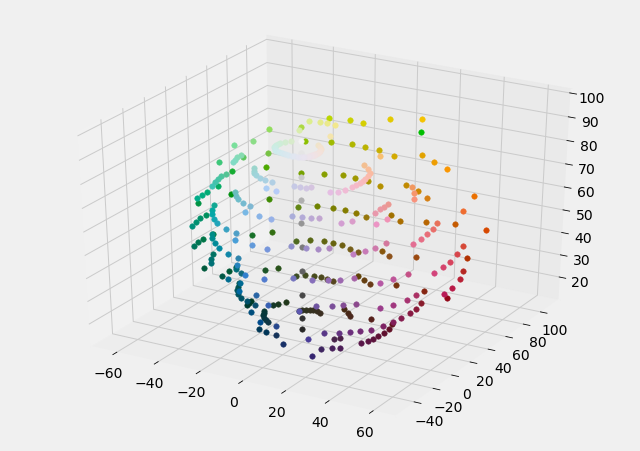

In [288]:
fig = plt.figure(figsize = (10, 7.5))
ax = fig.add_subplot(111, projection='3d')

for i in np.arange(330):
    ax.scatter(a_x[i], by[i], lz[i], color = matplotlib.colors.to_rgba(hexcolor[i]), s=30)
plt.show()

In [289]:
hexcolor = make_array()
for i in np.arange(len(a_x)):
    lab = LabColor(lz[i], a_x[i], by[i])
    rgb = convert_color(lab, sRGBColor)
    hexcolor = np.append(hexcolor, rgb.get_rgb_hex())

In [290]:
def plot_colors(colors):
    hexcolor = np.array([])
    for i in np.arange(len(colors)):
        L = colors[i][0]
        A = colors[i][1]
        B = colors[i][2]
        lab = LabColor(L, A, B)
        rgb = convert_color(lab, sRGBColor)
        hexcolor = np.append(hexcolor, rgb.get_rgb_hex())
    fig = plt.figure(figsize = (10, 7.5))
    ax = fig.add_subplot(111, projection='3d')
    for i in np.arange(330):
        ax.scatter(A, B, L, color = matplotlib.colors.to_rgba(hexcolor[i]), s=30)
    plt.show()

In [307]:
#for plotting
from wcsHelper import *
munsell_to_chip, chip_to_munsell, chip_to_clab, chip_to_rgb = readChipData('chipnum-info.txt')

lg86sp1 = namingData[62][5]
grid861 = naming2grid(lg86sp1, chip_to_rgb)
colors = grid861
tx = [i[1]*100 for i in colors]
ty = [i[2]*100 for i in colors]
tz = [i[0]*100 for i in colors]

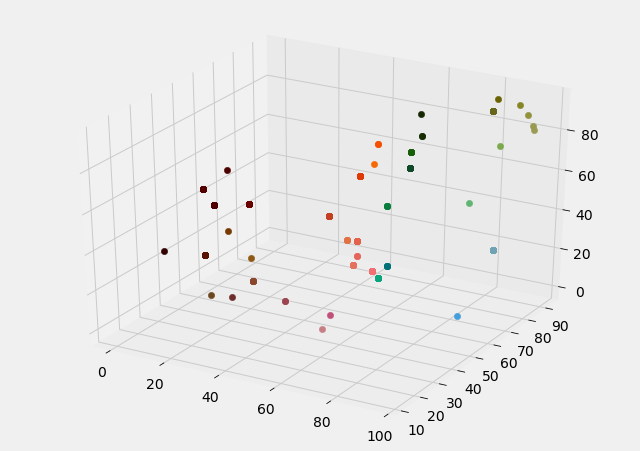

In [308]:
hexcolor = np.array([])
for i in np.arange(len(colors)):
    lab = LabColor(tz[i], tx[i], ty[i])
    rgb = convert_color(lab, sRGBColor)
    hexcolor = np.append(hexcolor, rgb.get_rgb_hex())
for i in range(len(hexcolor)):
    if len(hexcolor[i]) > 7:
        hexcolor[i] = '#'+str(hexcolor[i][2:])
fig = plt.figure(figsize =(10, 7.5))
ax = fig.add_subplot(111, projection='3d')
for i in np.arange(330):
    ax.scatter(tz[i], tx[i], ty[i], color = matplotlib.colors.to_rgba(hexcolor[i]), s=40)
plt.show()

In [45]:
#for plotly
test_colors = []
tx = [i[1]*100 for i in colors]
ty = [i[2]*100 for i in colors]
tz = [i[0]*100 for i in colors]
for i in np.arange(len(tx)):
    lab = LabColor(tx[i], ty[i], tz[i])
    rgb = convert_color(lab, sRGBColor)
    r = str(rgb.get_value_tuple()[0] * 255)
    g = str(rgb.get_value_tuple()[1] * 255)
    b = str(rgb.get_value_tuple()[2] * 255)
    test_colors += ['rgb('+ r + ', ' + g +', ' +  b + ')']